In [1]:
#Customer Segmentation and Analysis
#Steps to solve the problem :
#Importing Libraries.
#Exploration of data.
#Data Visualization.
#Clustering using K-Means.
#Selection of Clusters.
#Ploting the Cluster Boundry and Clusters.
#3D Plot of Clusters.


In [2]:
#Importing Libraries.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")

In [3]:
# Explore the data
data = pd.read_csv("Mall_Customers.csv")

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.describe

<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [6]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
plt.style.use("fivethirtyeight") ## use fivethirtyeight style for plotting

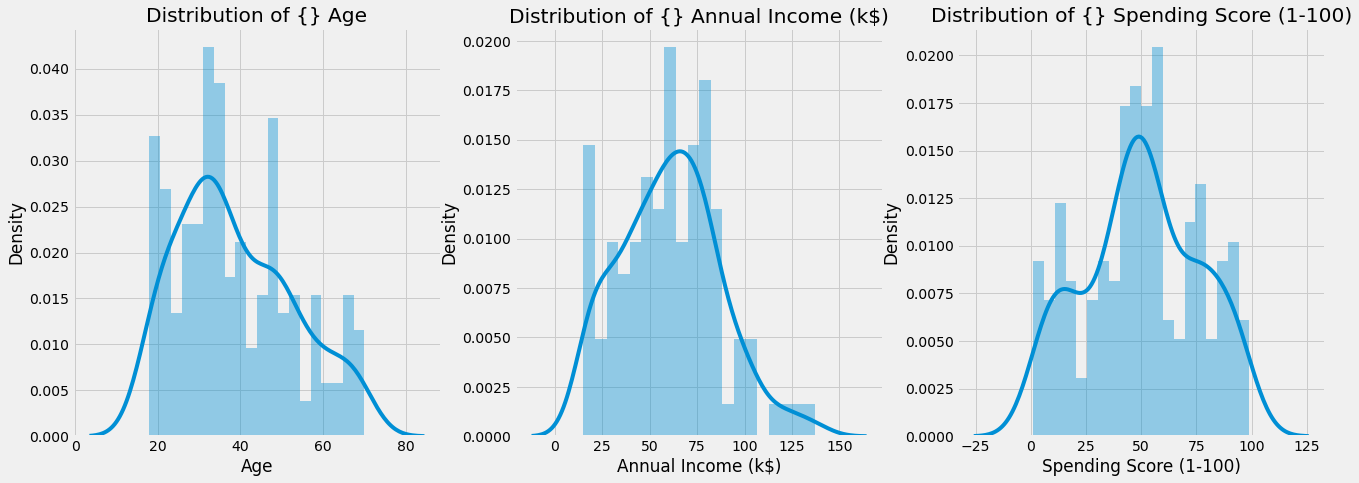

In [9]:
# look at the distribution of age income and spending score by using distplot() function

plt.figure(figsize = (20 , 7)) # to create a new figure & adjust figure sizes
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3, n) # divide the graphs for in specificed destinations
    sns.distplot(data[x] , bins = 20) ## show the distribution of the data set individually for age, income and score
    plt.title('Distribution of {}'+" "+ x) ## can be used .format(x) function to set the titles
plt.show()

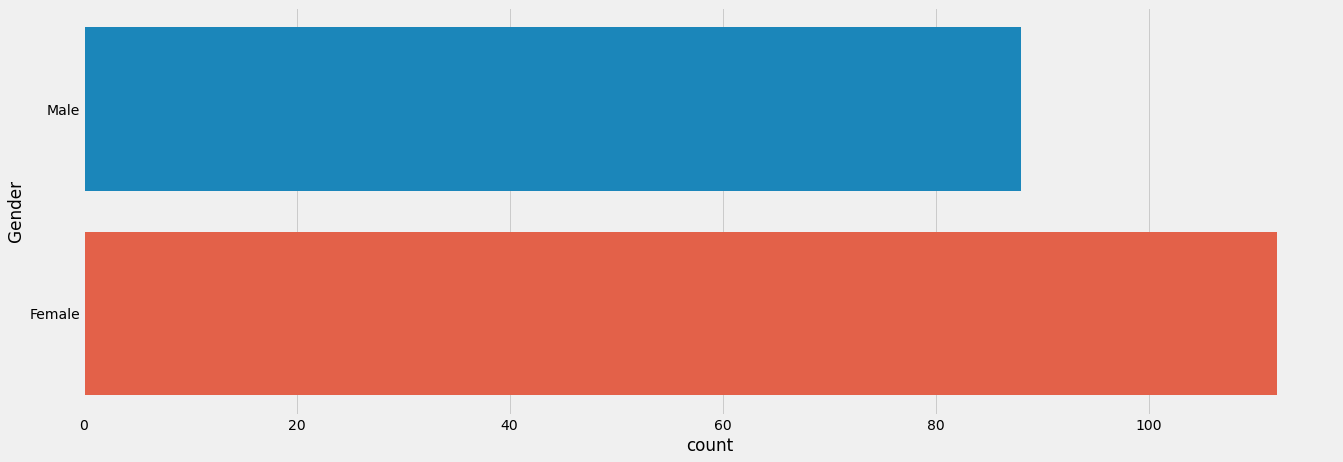

In [10]:
## count plot for gender

plt.figure(1 , figsize = (20 , 7))
sns.countplot(y = 'Gender' , data = data)
plt.show()


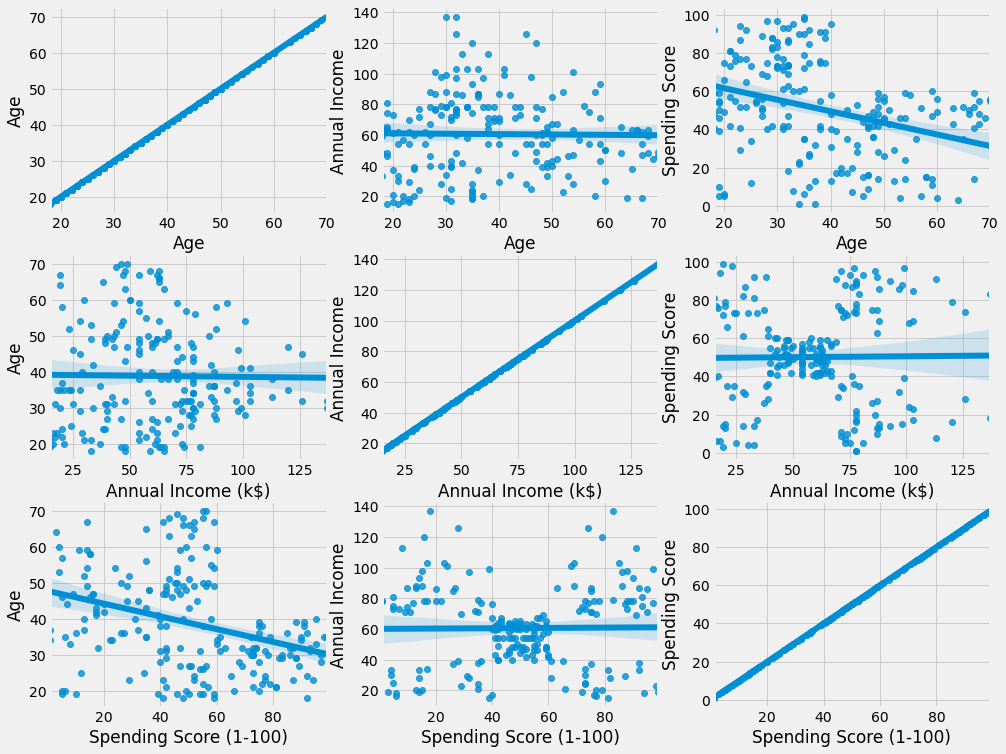

In [11]:
#Ploting the Relation between Age , Annual Income and Spending Score

plt.figure(figsize = (15 , 12))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        sns.regplot(x = x , y = y , data = data) #used to plot data and a linear regression model fit.
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y  )
plt.show()

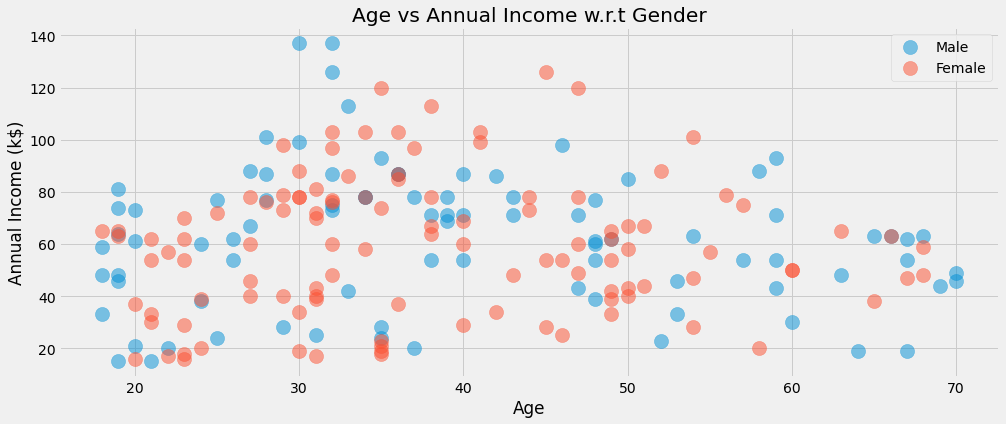

In [12]:
# look at the relation of age and annual income in terms of gender

plt.figure(1 , figsize = (15 , 6))
color_dict = dict({"Male" : "blue",
                 "Female" : "red"})
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = data[data['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender) # Scatter plots uses dots to represent the relationship btw variables.
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

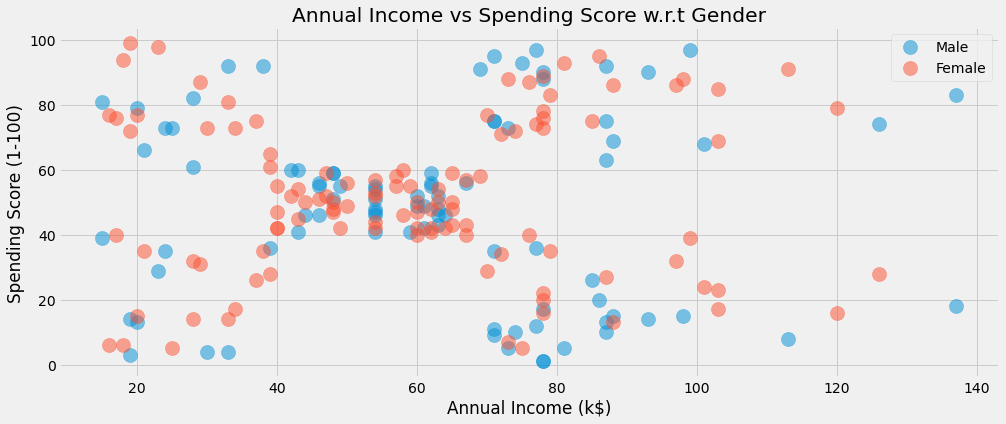

In [13]:
#look at the relation btw income and spending score in terms of gender

plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = data[data['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

In [14]:
#Clustering using K- means
#Segmentation using Age and Spending Score
'''Age and spending Score'''
X1 = data[['Age' , 'Spending Score (1-100)']].values
inertia = []
 # KMEANS PARAMATER DEFINITIONS: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
 

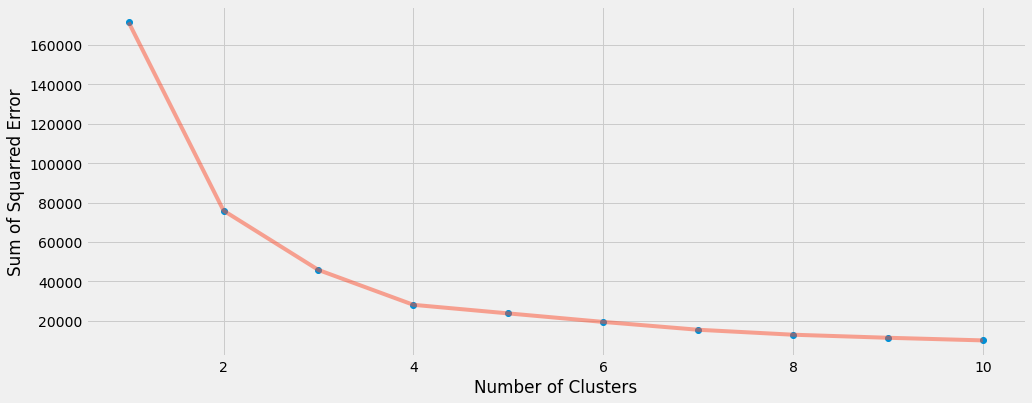

In [90]:
##find the elbow point and decide the number of clusters of the algorithm

plt.figure(figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Sum of Squarred Error')
plt.show()

In [16]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_


cluster_map = pd.DataFrame()
cluster_map['data_index'] = data.index.values
cluster_map['cluster'] = labels1

cluster_map[cluster_map.cluster == 1]["data_index"]

centroids1,labels1

(array([[27.61702128, 49.14893617],
        [43.29166667, 15.02083333],
        [30.1754386 , 82.35087719],
        [55.70833333, 48.22916667]]),
 array([0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 1, 2, 0, 2,
        1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 3, 0,
        1, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
        3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
        0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
        3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 2, 0, 2, 3, 2, 1, 2, 1, 2,
        0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2,
        1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2,
        1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
        1, 2]))

In [67]:

xx.ravel(), yy.ravel(),np.c_[xx.ravel(), yy.ravel()]

(array([18.  , 18.02, 18.04, ..., 69.94, 69.96, 69.98]),
 array([ 1.  ,  1.  ,  1.  , ..., 98.98, 98.98, 98.98]),
 array([[18.  ,  1.  ],
        [18.02,  1.  ],
        [18.04,  1.  ],
        ...,
        [69.94, 98.98],
        [69.96, 98.98],
        [69.98, 98.98]]))

In [62]:
h = 0.02
x_min, x_max = X1[:, 0].min(), X1[:, 0].max()
y_min, y_max = X1[:, 1].min(), X1[:, 1].max()

## arrange() generates outputs between min and max within specified intervals
## meshgrid() returns two 2-dimensional arrays, representing the X and Y coordinates of all the points. 
## ravel() specify all of the values of an array in one row (each column includes only one value)
## np.c_ concenation of two raveled arrays 
## use algorithm.predict to estimate the clusters for each value in concenated xx and yy (algorithm is defined under KMeans)
## PREDICT FUCNTION : https://www.askpython.com/python/examples/python-predict-function
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 


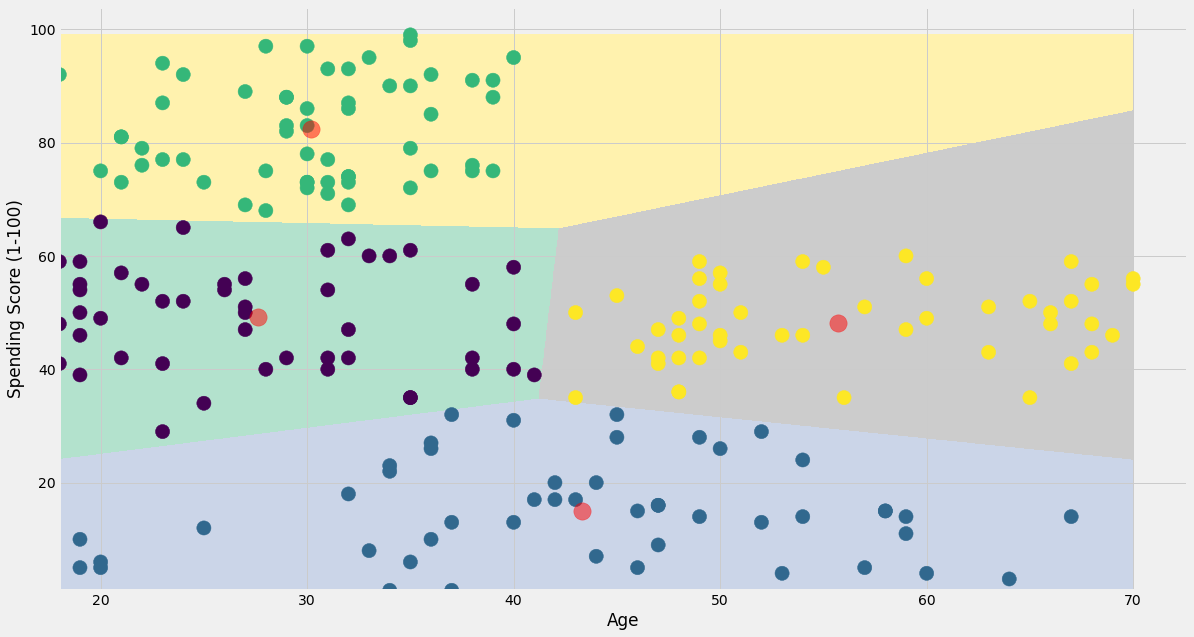

In [66]:
plt.figure(figsize = (18 , 10) )
plt.clf() # used to clear the current figure.
Z = Z.reshape(xx.shape) ##https://www.geeksforgeeks.org/reshape-numpy-array/
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower') ## https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = data , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')

plt.show()

In [75]:
cluster_map = pd.DataFrame()
cluster_map["Customer_ID"] = data["CustomerID"].values
cluster_map['Cluster'] = algorithm.labels_
cluster_map

,Customer_ID,Cluster
0,1,0
1,2,2
2,3,1
3,4,2
4,5,0
...,...,...
195,196,2
196,197,1
197,198,2
198,199,1


In [89]:
df= data
df["Cluster"] = cluster_map["Cluster"]
df.groupby("Cluster").mean()[["Age", "Annual Income (k$)", "Spending Score (1-100)"]] 

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,27.617021,53.276596,49.148936
1,43.291667,66.937500,15.020833
2,30.175439,66.070175,82.350877
3,55.708333,54.770833,48.229167
